In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser
 
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = '/Users/animatevosian/Desktop/ml/final_assignment_3/option_2/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

<!-- Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv).  -->

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 
I chose the following variables:
 

- **representation**: indicates the work represents some aspect of reality, =TRUE if the work is **very** representational
- **representation_semi**: indicates the work represents some aspect of reality, =TRUE if the work is **somewhat** representational
- **kinetic**: indicates the work moves or has movement	
- **ar**: An AREA signifies something on the plane that has a measurable size. This signification applies to the entire area covered by the visible mark.	
- **te**: variation in the fineness or coarseness of an area having a given value; includes blur	
- **spatial_dimension**: indicates the work is an object that is occupying physical space in more than 2 dimensions (height in addition to length and width), where =TRUE if work is the work is **strongly** spatial
- **spatial_dimension2**: indicates the work is an object that is occupying physical space in more than 2 dimensions (height in addition to length and width), where =TRUE if work is the work is **somewhat** spatial
- **art_movement**: name of art movement	

 I wanted to approach clustering the artworks in a comprehensive way, by including diverse artistic qualities. "Representation" and "Representation_semi" gauge the degree of realism, aiding in grouping artworks with shared themes and visual styles. "Kinetic" identifies artworks with movement, potentially grouping pieces with similar energy. "Ar" which focuses on the area, and “Te” which focuses on variation in texture, contributes to clustering based on spatial composition and aesthetic features of the art. "Spatial Dimension" and "Spatial Dimension2" distinguish artworks by their physical presence, allowing for clustering based on sculptural or installation qualities. Together, these variables offer a broad view of artistic characteristics, enabling the identification of cohesive clusters based on shared themes, composition, visual qualities, techniques, and spatial elements. 

In [5]:
# X = data[['va', 'si','te','po','li','sh','or','representation','representation_semi']] #lots of visually similar ones
X = data[['representation_semi','representation','art_movement','kinetic','ar','te','spatial_dimension2','spatial_dimension']] ##- 4/ 7 / 24
# X = data[['representation_semi', 'kinetic','ar','te','pl','spatial_dimension2']] 
# X = data[['pl','kinetic','representation_semi','spatial_dimension2','ar','map2']] #maybe also 5/7/24
# X = data[['representation_semi', 'kinetic','spatial_dimension','te']]
# X = data[['representation_semi', 'kinetic','sh','te']] //interesting maybe
# X = data[['representation_semi','representation', 'kinetic','ar']] ##-interesting maybe too
# X = data[['representation','kinetic','spatial_dimension2']]

In [6]:
X.head()

,representation_semi,representation,art_movement,kinetic,ar,te,spatial_dimension2,spatial_dimension
0,False,True,surrealism,False,5,0,False,False
1,False,True,arte povera,False,5,3,False,True
2,False,True,modernism,False,5,4,False,False
3,False,False,abstraction,False,5,2,True,False
4,False,False,abstraction,False,5,4,False,False


# KMeans

In [7]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

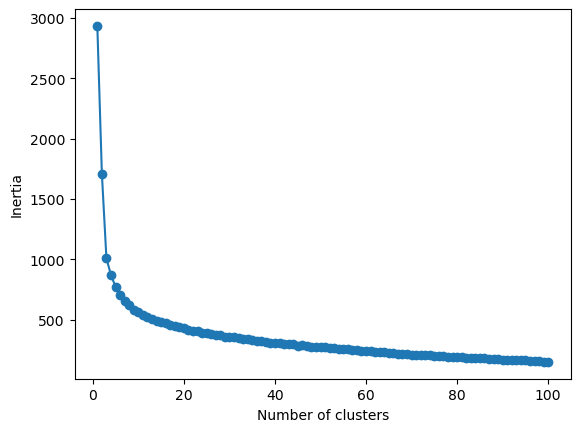

In [8]:
X = pd.get_dummies(X) #assigns number to categories
#elbow is around 20
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [9]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [5, 10, 12, 15,20,22, 25]
#change cluster values we want to see

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.28148142652540803


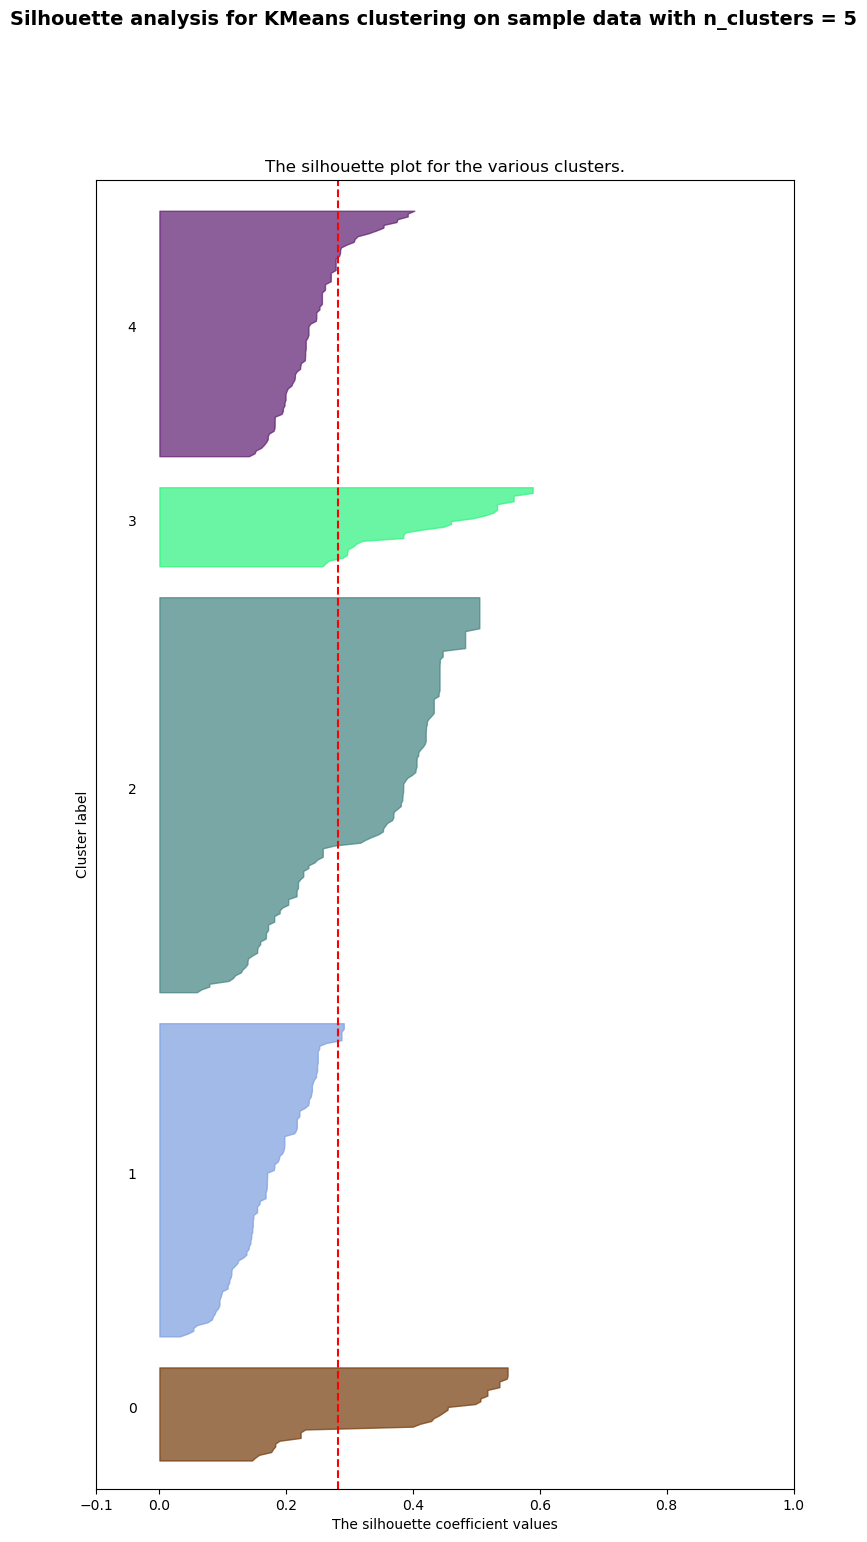

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.2194680642287677


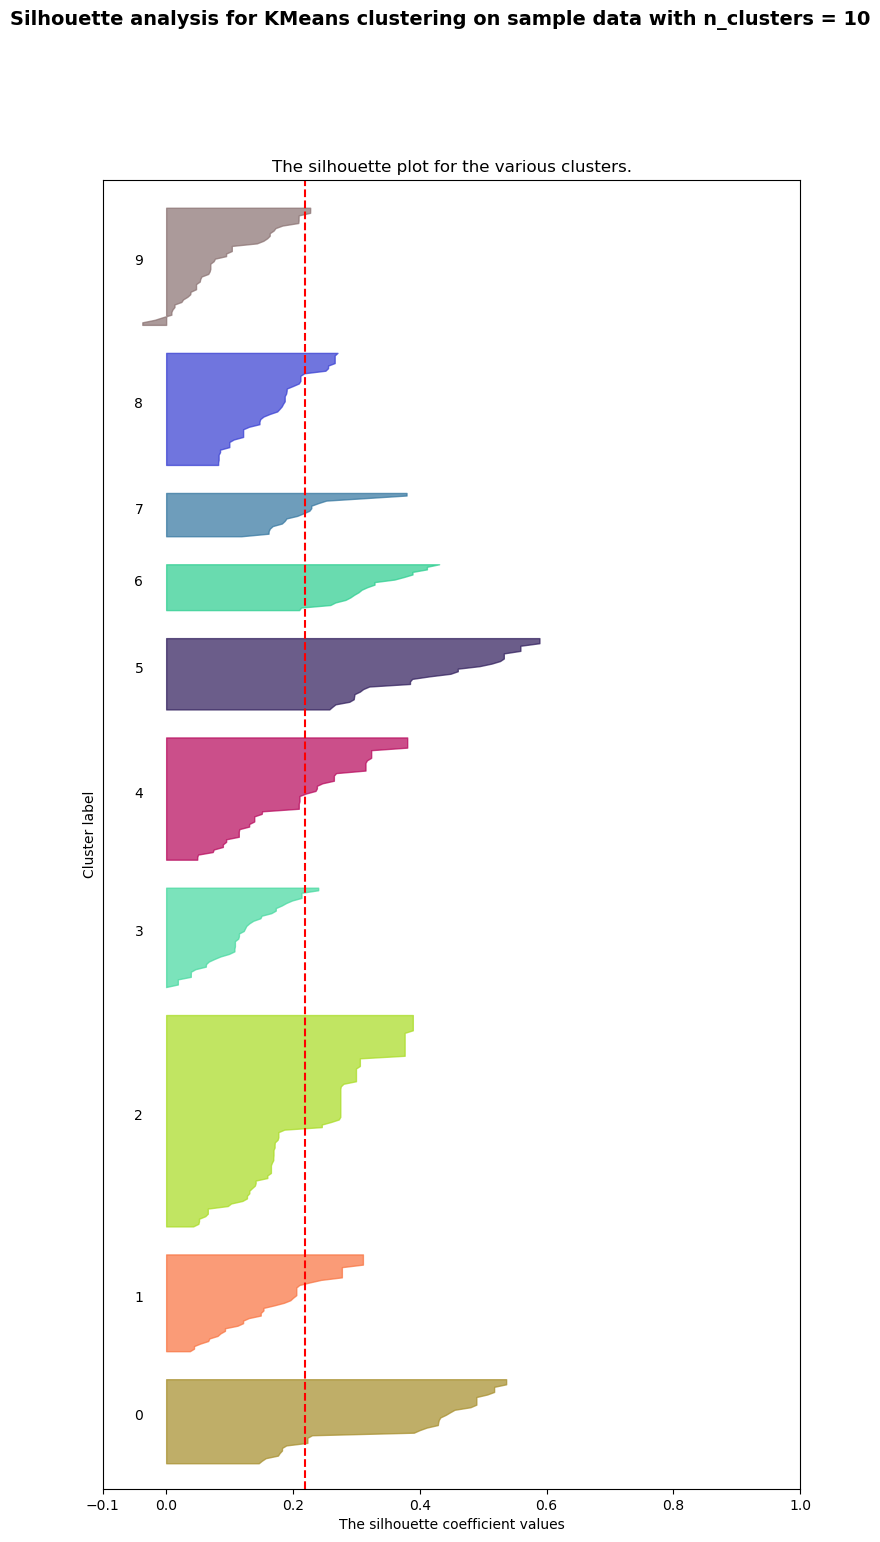

For n_clusters = 12 The average silhouette_score is : 0.22523896170399677


/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


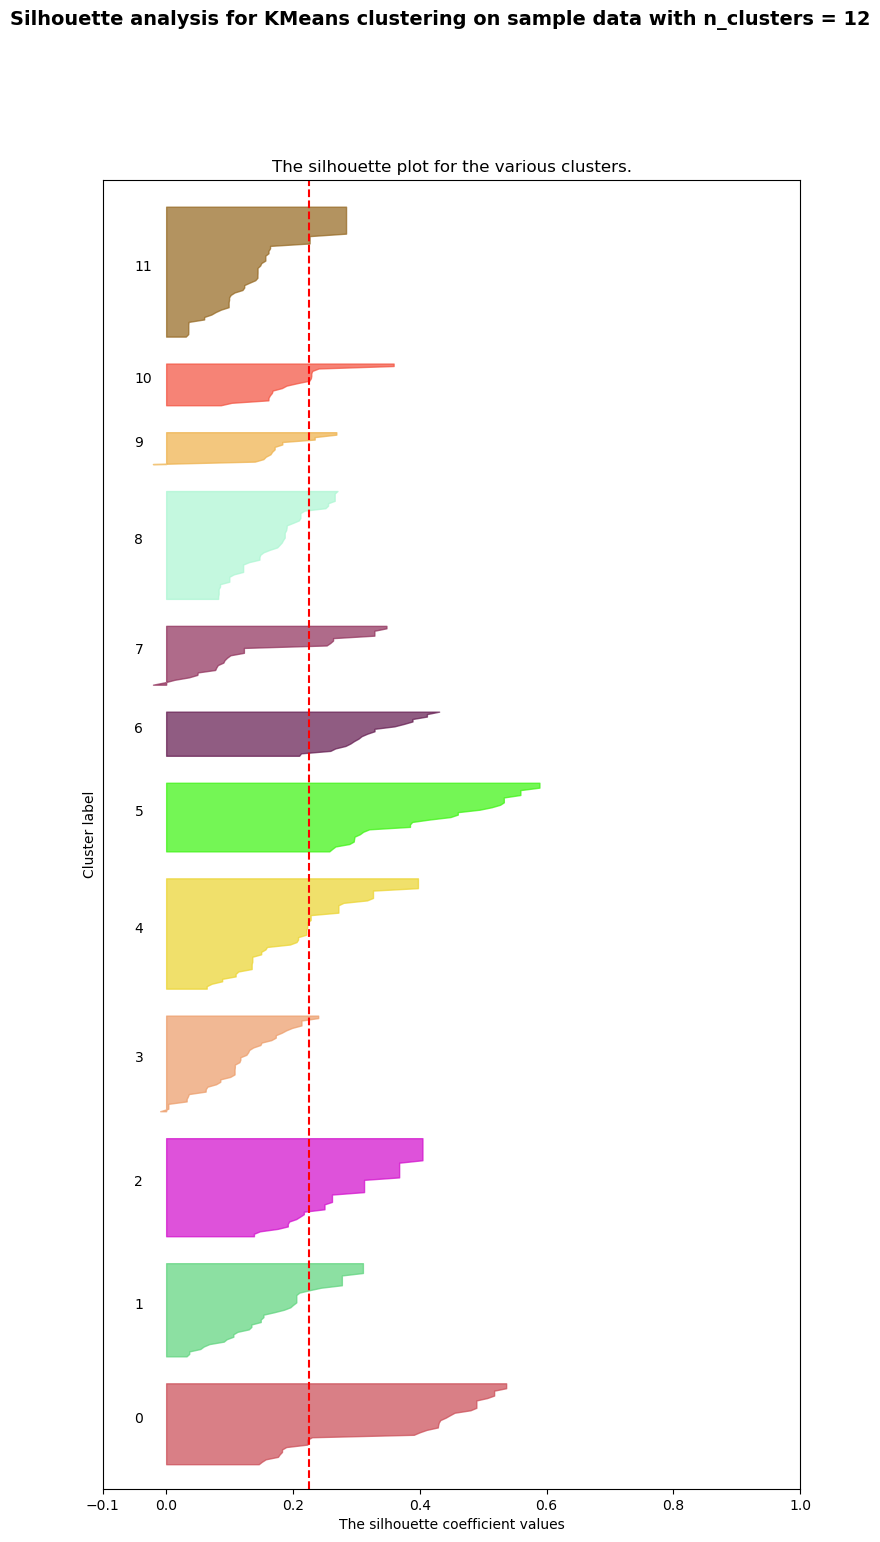

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.20923741780298213


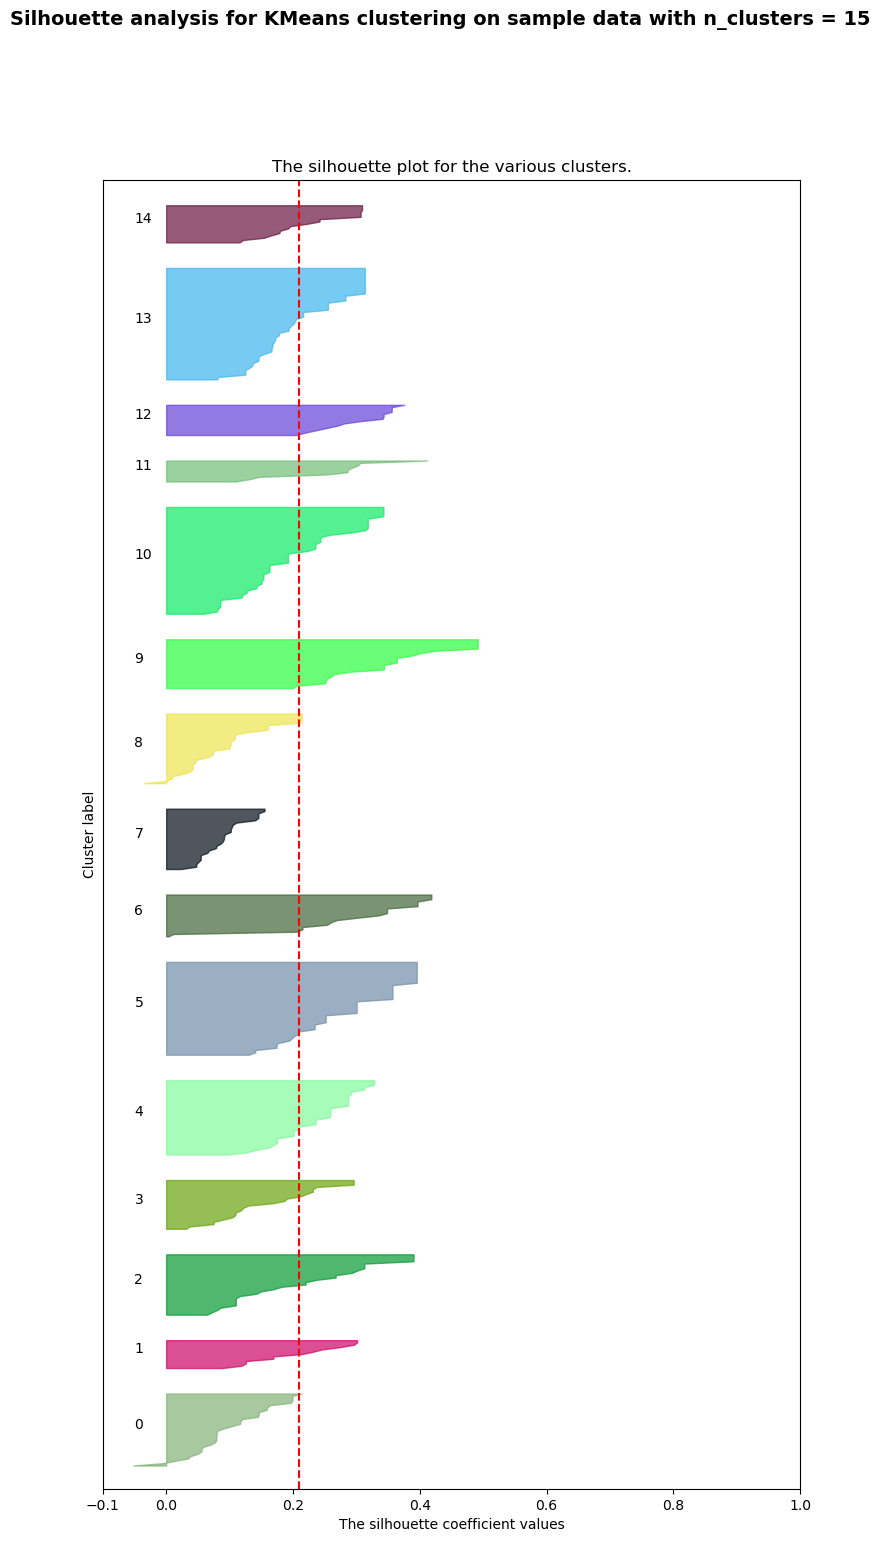

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 20 The average silhouette_score is : 0.2407501897947075


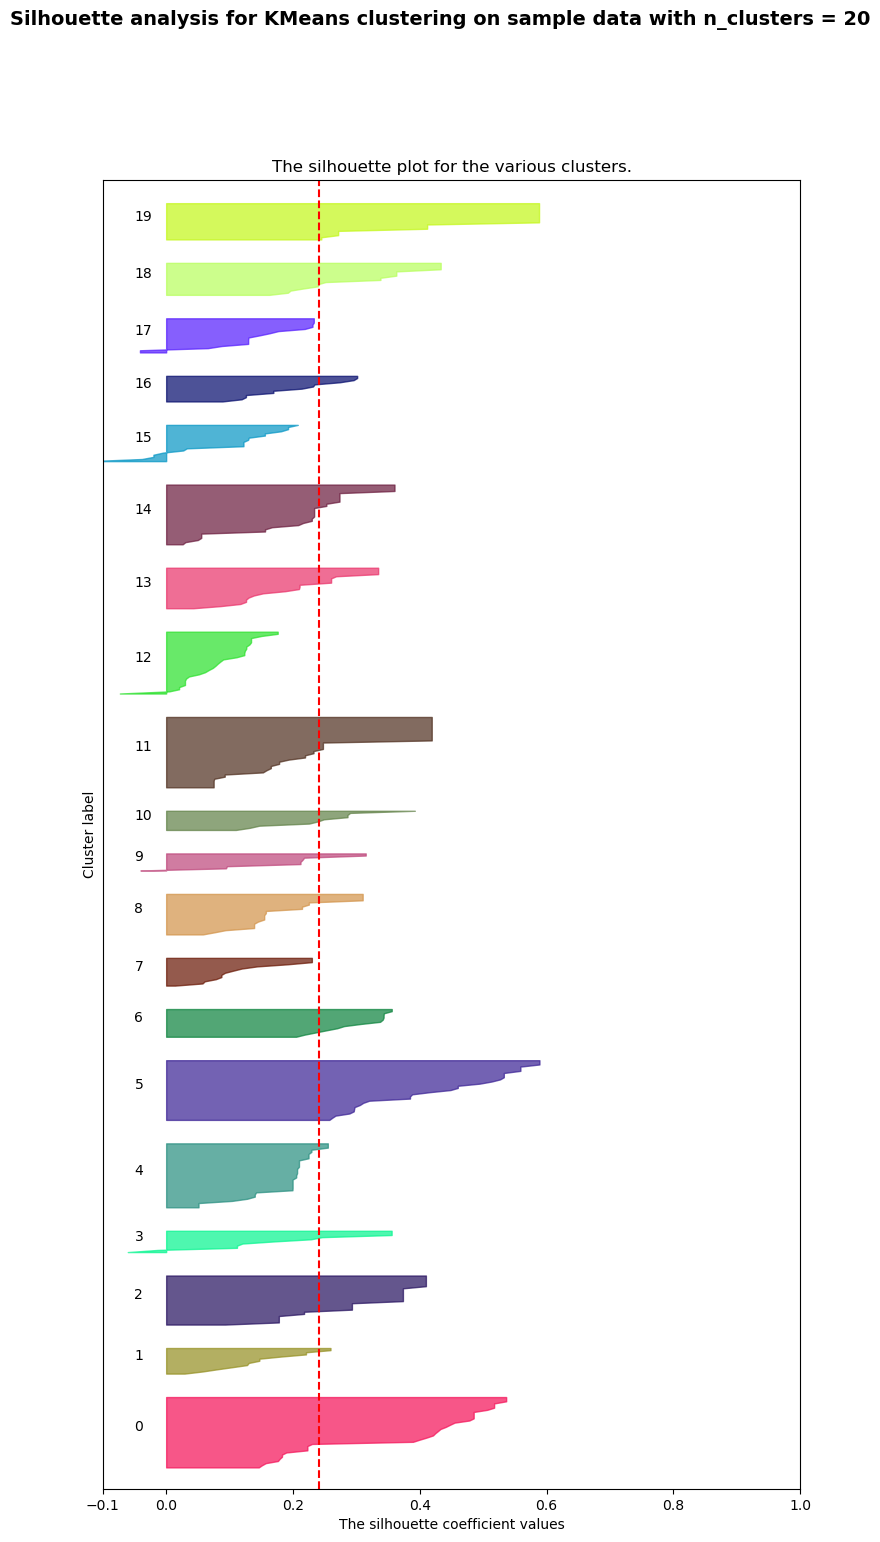

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 22 The average silhouette_score is : 0.20571384784297153


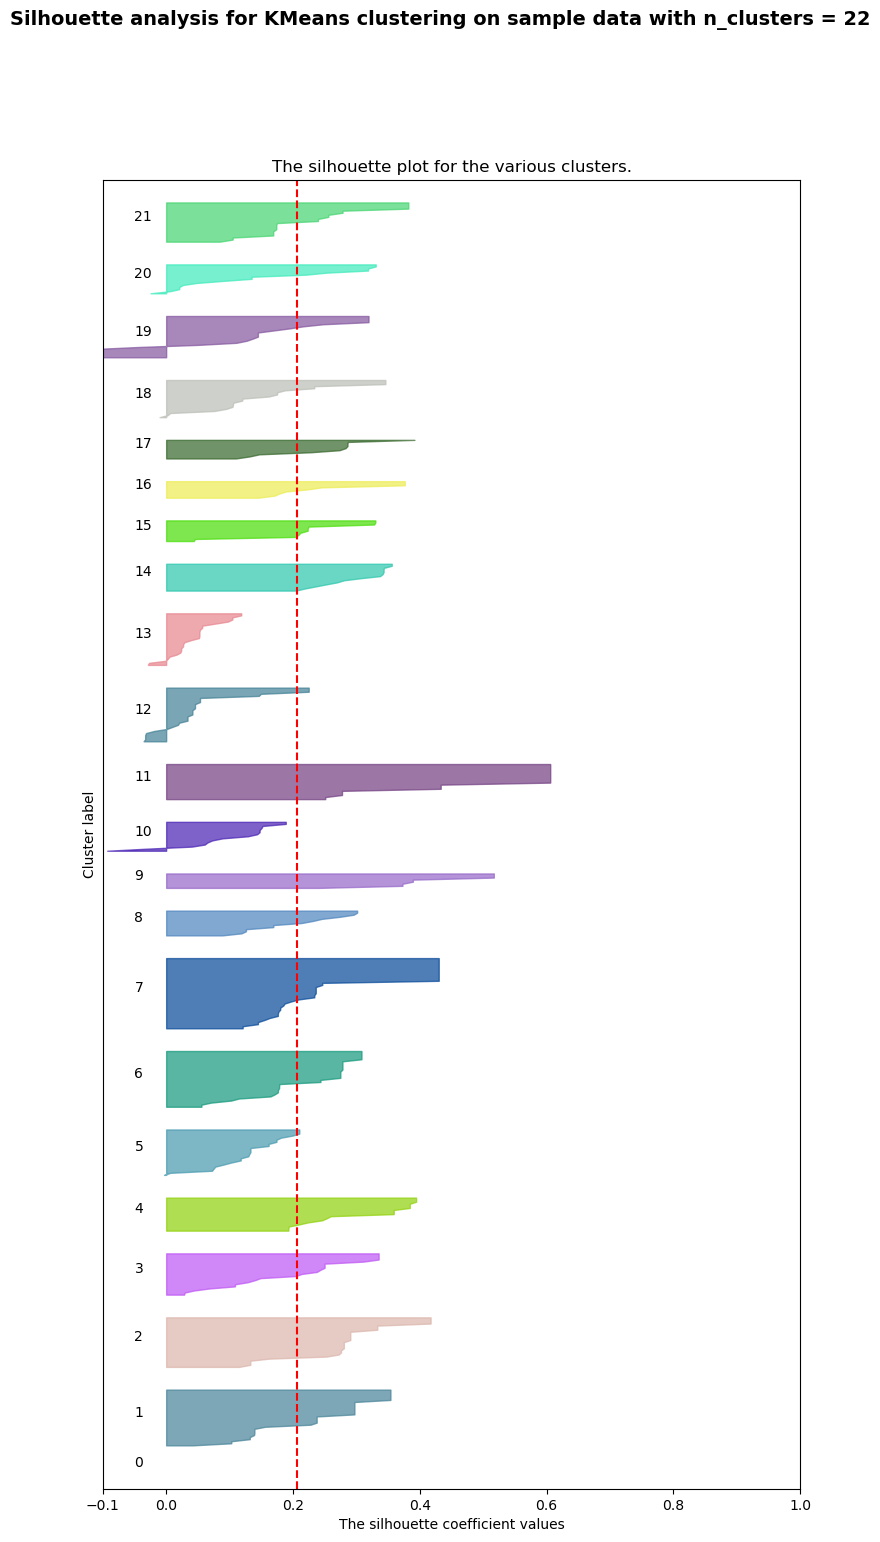

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : 0.20139985994695256


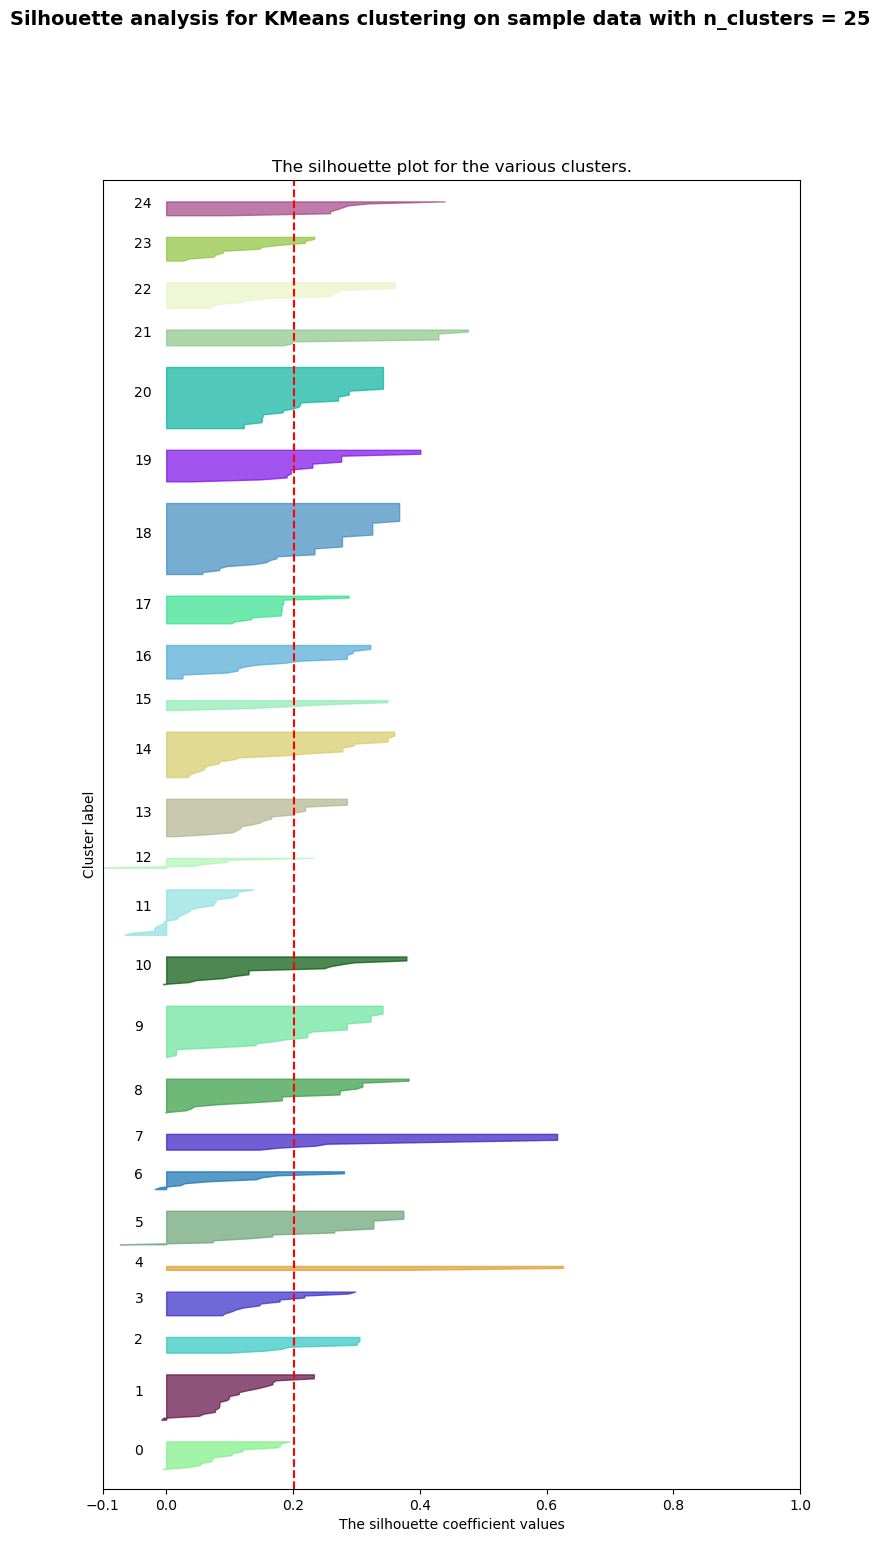

In [10]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. 
10 appears to be a good amount of clusters for the features I chose, as deduced from the elbow graph.

In [11]:
# set the number of clusters in the final model

my_n_clusters = 12

In [12]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

## 

## Results 
#### Resulting clusters are visualized in a grid with some metadata, and output both below and as an html file that can be viewed separately (stored in the same folder as this notebook).

In [17]:
num_images_per_row = 5  # Number of images to display per row in the grid

with open("clusters_visualization.html", "w") as f:
    f.write("<html><head><title>Clusters Visualization</title></head><body>")
    
    for i in range(0, max(km.labels_)+1):
        f.write("<div>")
        f.write("<h2>Images in cluster: " + str(i) + "</h2>")
        
        # Start grid layout
        f.write("<div style='display:flex; flex-wrap:wrap;'>")
        
        count = 0  # Counter to keep track of the number of images in the current row
        
        for j in range(0, len(km.labels_)):
            if km.labels_[j] == i:
                img_path = "img_small/" + str(j+2) + '_small.jpg'
                f.write("<div style='flex:1; padding:5px;'>")
                f.write("<img src='" + img_path + "' style='max-width:150px; max-height:150px;'>")
                f.write("<p>Cluster: " + str(i) + "</p>")
                f.write("<p>Artist: " + str(data.loc[j, 'artist']) + "</p>")
                f.write("<p>Title: " + str(data.loc[j, 'title']) + "</p>")
                f.write("<p>Medium: " + str(data.loc[j, 'medium']) + "</p>")
                f.write("</div>")
                
                count += 1
                
                # Check if reached the maximum number of images per row
                if count == num_images_per_row:
                    f.write("<br>")  # Start a new row
                    count = 0  # Reset the counter
        
        # End grid layout
        f.write("</div>")
        
        f.write("</div>")
    
    f.write("</body></html>")

    f.close()
    
# webbrowser.get("chrome")
# webbrowser.open_new_tab("clusters_visualization.html")

from IPython.display import HTML
HTML(filename="clusters_visualization.html")